In [25]:
import os

import numpy as np
import pandas as pd
import networkx as nx
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

from graphlets import gtrie_generators, Gtrie, utils

In [26]:
data_path = '../data/'
template = data_path + 'CGCS-Template.csv'
G1_cand = data_path + 'Q1-Graph1.csv'
G2_cand = data_path + 'Q1-Graph2.csv'
G3_cand = data_path + 'Q1-Graph3.csv'
G4_cand = data_path + 'Q1-Graph4.csv'
G5_cand = data_path + 'Q1-Graph5.csv'

In [27]:
def path_to_graph(path):
    df = pd.read_csv(path, usecols=[0,1,2])
    df = df[(df['eType'] == 0) | (df['eType'] == 1)]
    
    G = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=nx.DiGraph)
    return G

In [28]:
# Gtrie is the data structure to count the graphlets. This one already store all directed graphlets of size 4
gtrie = gtrie_generators.GTRIE_ALL_N3_DIR
# We need the number of automorphs for each graphlets to normalize the frequencies
n_automorphs = gtrie_generators.graphlets_N3_dir_Nautomorphs

In [34]:
def count_graphlets(G, gtrie, automorphs_freq, N=3):
    '''Return dataframe of graphlet absolute frequencies'''
    census = Gtrie.Census(gtrie, G)
    census.gtrie_match(verbose=False)
    
    raw_freqs = census.graphlet_freq
    freqs_norm = utils.normalize_freqs(raw_freqs, automorphs_freq)
    
    df_freqs = pd.DataFrame(freqs_norm).T
    df_freqs = df_freqs.fillna(0)
    
    # count frequencies for entire graph
    df_freqs.loc['graph'] = df_freqs.sum() / N
    
    return df_freqs

In [35]:
def path_to_freq_csv(path, gtrie, automorph_freqs):
    G = path_to_graph(path)
    df_freq = count_graphlets(G, gtrie, automorph_freqs)
    df_freq.to_csv('../graphlet_freqs/' + 'freqs_' + os.path.basename(path))

In [36]:
path_to_freq_csv(template, gtrie, n_automorphs)
path_to_freq_csv(G1_cand, gtrie, n_automorphs)
path_to_freq_csv(G2_cand, gtrie, n_automorphs)
path_to_freq_csv(G3_cand, gtrie, n_automorphs)
path_to_freq_csv(G4_cand, gtrie, n_automorphs)
path_to_freq_csv(G5_cand, gtrie, n_automorphs)

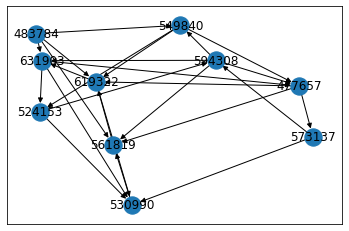

In [32]:
GT = path_to_graph(template)
G1 = path_to_graph(G1_cand)
G2 = path_to_graph(G2_cand)
G3 = path_to_graph(G3_cand)
G4 = path_to_graph(G4_cand)
G5 = path_to_graph(G5_cand)
nx.draw_networkx(G5)

In [33]:
GT_freqs = count_graphlets(GT, gtrie, n_automorphs)
G1_freqs = count_graphlets(G1, gtrie, n_automorphs)
G2_freqs = count_graphlets(G2, gtrie, n_automorphs)
G3_freqs = count_graphlets(G3, gtrie, n_automorphs)
G4_freqs = count_graphlets(G4, gtrie, n_automorphs)
G5_freqs = count_graphlets(G5, gtrie, n_automorphs)

In [178]:
def find_node_pairs(df1, df2):
    distances = cdist(df1, df2, 'euclid')
#     print(distances)
    mins = np.argmin(distances, axis=1)
#     print(mins)
#     print(len(mins))
    
    best_matchs = {}
    for i, min_ind in enumerate(mins):
        best_matchs[df1.index[i]] = df2.index[min_ind]
        
    return best_matchs

In [179]:
match_G1 = find_node_pairs(GT_freqs, G1_freqs)
match_G2 = find_node_pairs(GT_freqs, G2_freqs)
match_G3 = find_node_pairs(GT_freqs, G3_freqs)
match_G4 = find_node_pairs(GT_freqs, G4_freqs)
match_G5 = find_node_pairs(GT_freqs, G5_freqs)

In [157]:
def compare(G1, G2, match):
    print(match)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    nx.draw_networkx(G1, pos=nx.kamada_kawai_layout(G1), ax=axes[0], font_color='red')
    nx.draw_networkx(G2, pos=nx.kamada_kawai_layout(G2), ax=axes[1], font_color='red')

{41: 550361, 34: 550361, 37: 550361, 27: 623295, 40: 512397, 0: 550287, 39: 570411, 65: 512397, 67: 512397, 47: 550361, 66: 464459, 43: 550361, 56: 550361, 57: 492777, 58: 550361, 63: 550361, 45: 550361}


/home/alexis/apps/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/alexis/apps/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


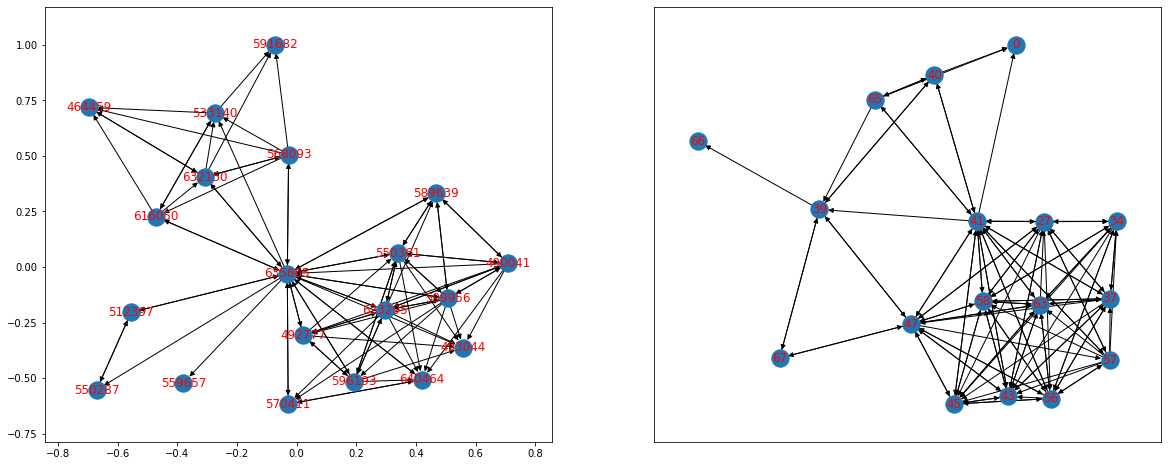

In [158]:
compare(G1, GT, match_G1)

{41: 585212, 34: 477138, 37: 477138, 27: 527597, 40: 563211, 0: 644830, 39: 639051, 65: 644830, 67: 644830, 47: 585212, 66: 644830, 43: 477138, 56: 527597, 57: 544615, 58: 477138, 63: 477138, 45: 477138}


/home/alexis/apps/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/alexis/apps/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


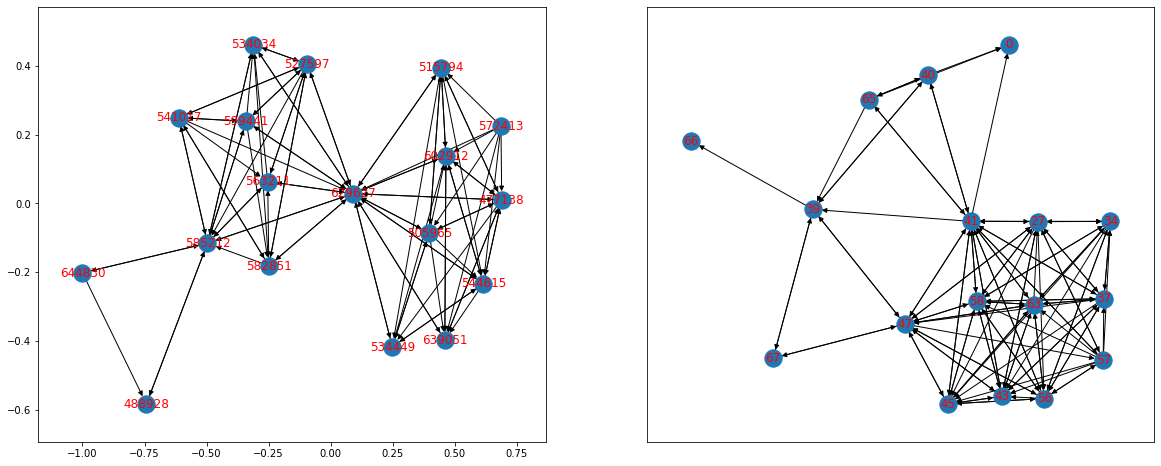

In [162]:
compare(G2, GT, match_G2)

{41: 538892, 34: 607386, 37: 607386, 27: 607386, 40: 614761, 0: 542965, 39: 538892, 65: 614761, 67: 614761, 47: 538892, 66: 542965, 43: 607386, 56: 607386, 57: 607386, 58: 541619, 63: 541619, 45: 607386}


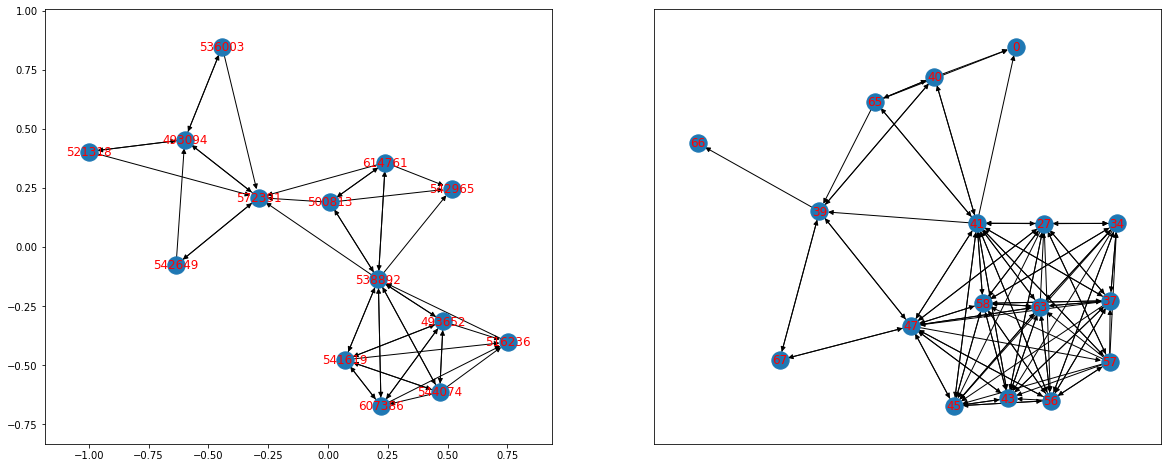

In [163]:
compare(G3, GT, match_G3)

{41: 573137, 34: 573137, 37: 573137, 27: 573137, 40: 573137, 0: 573137, 39: 573137, 65: 573137, 67: 573137, 47: 573137, 66: 573137, 43: 573137, 56: 573137, 57: 573137, 58: 573137, 63: 573137, 45: 573137}


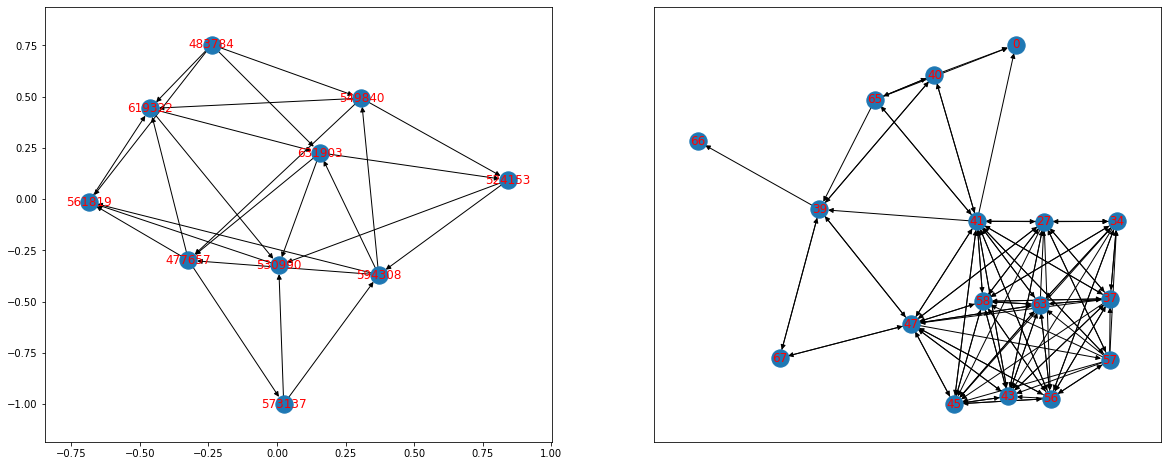

In [173]:
compare(G5, GT, match_G5)